In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\Users\pawan\anaconda3\envs\dataanalysispython\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\pawan\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\ed776e5a0a8c40ea9d5efbd800772ae52e140f3e (last modified on Mon Aug 18 00:35:26 2025).


In [2]:
df.pivot_table(index='job_title_short', aggfunc='size')

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [3]:
df.groupby(['job_title_short', ]).size()

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [4]:
df.pivot_table(values= 'salary_year_avg', index='job_title_short', columns='job_country', aggfunc='median')

job_country,Albania,Algeria,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bangladesh,Belarus,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vietnam,Zambia,Zimbabwe
job_title_short,,,,,,,,,,,,,,,,,,,,,
Business Analyst,NaN,NaN,71100.00,NaN,70000.0,NaN,NaN,NaN,16500.0,NaN,...,NaN,72900.0,NaN,56700.0,90000.0,NaN,NaN,79200.0,NaN,NaN
Cloud Engineer,NaN,NaN,197500.00,NaN,110000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,89100.0,NaN,NaN,116100.0,NaN,NaN,NaN,NaN,NaN
Data Analyst,49950.00,44100.0,92771.75,100500.0,109500.0,80850.00,NaN,NaN,NaN,400000.0,...,69300.0,72900.0,98500.0,87750.0,90000.0,100500.0,NaN,75550.0,NaN,63000.0
Data Engineer,NaN,45000.0,96773.00,48750.0,106712.5,147500.00,NaN,211000.0,97444.0,NaN,...,NaN,89100.0,97528.0,110000.0,125000.0,NaN,NaN,96773.0,NaN,NaN
Data Scientist,69981.25,NaN,71000.00,NaN,139216.0,71249.75,NaN,NaN,NaN,NaN,...,84200.0,131846.5,166419.5,105300.0,130000.0,NaN,30750.0,70000.0,90670.0,69085.0
Machine Learning Engineer,NaN,NaN,101029.00,87021.0,101029.0,89100.00,NaN,228750.0,69000.0,NaN,...,NaN,89100.0,62850.0,149653.0,150000.0,50000.0,NaN,57600.0,NaN,NaN
Senior Data Analyst,NaN,NaN,NaN,NaN,50640.0,89100.00,NaN,NaN,NaN,NaN,...,NaN,NaN,105837.5,111175.0,110000.0,NaN,NaN,105837.5,NaN,NaN
Senior Data Engineer,NaN,NaN,147500.00,NaN,147500.0,147500.00,NaN,173500.0,NaN,NaN,...,NaN,96773.0,NaN,147500.0,150000.0,NaN,NaN,147500.0,NaN,NaN
Senior Data Scientist,157500.00,NaN,NaN,NaN,157500.0,80850.00,NaN,NaN,NaN,NaN,...,NaN,157500.0,72000.0,157500.0,155000.0,57500.0,NaN,79200.0,NaN,NaN


In [5]:
top_countries = df['job_country'].value_counts().head(6).index
# top_countries = top_countries.index.tolist()
df_job_country_salary= df.pivot_table(
    values='salary_year_avg',
    index='job_country',
    columns='job_title_short',
    aggfunc='median'    
)

df_job_country_salary

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


In [6]:
job_title= ['Data Analyst', 'Data Engineer', 'Data Scientist', 'Machine Learning Engineer']
df_job_country_salary = df_job_country_salary.loc[top_countries]
df_job_country_salary = df_job_country_salary[job_title]
df_job_country_salary

job_title_short,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer
job_country,,,,
United States,90000.0,125000.0,130000.0,150000.0
India,100500.0,147500.0,114008.0,79200.0
United Kingdom,87750.0,110000.0,105300.0,149653.0
France,69175.0,98301.5,88128.0,80850.0
Germany,103750.0,147500.0,131560.0,89100.0
Spain,91977.0,133000.0,88128.0,101029.0


Text(0.5, 1.0, 'Median Salary by Job Title and Country')

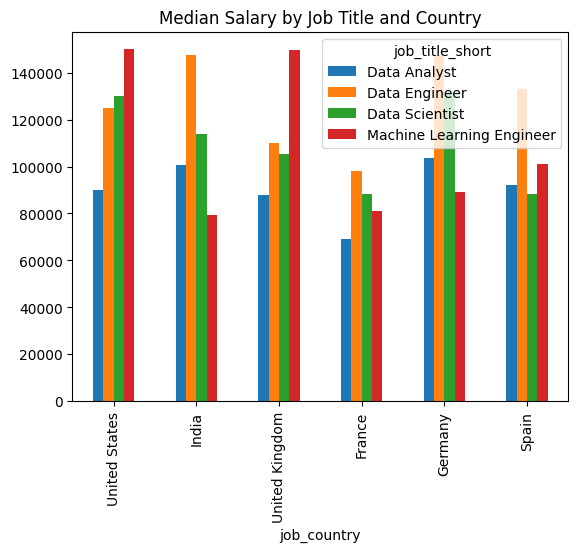

In [7]:
df_job_country_salary.plot(kind='bar')
plt.title('Median Salary by Job Title and Country')

#pivot tables


count number of jobs

In [8]:
df.pivot_table(index = 'job_title_short', values= 'salary_year_avg', aggfunc='median')

,salary_year_avg
job_title_short,
Business Analyst,85000.0
Cloud Engineer,90000.0
Data Analyst,90000.0
Data Engineer,125000.0
Data Scientist,127500.0
Machine Learning Engineer,106415.0
Senior Data Analyst,111175.0
Senior Data Engineer,147500.0
Senior Data Scientist,155500.0


In [9]:
df.pivot_table(index = 'job_title_short', columns='job_country' , values= 'salary_year_avg', aggfunc='median').head(5)

job_country,Albania,Algeria,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bangladesh,Belarus,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vietnam,Zambia,Zimbabwe
job_title_short,,,,,,,,,,,,,,,,,,,,,
Business Analyst,NaN,NaN,71100.00,NaN,70000.0,NaN,NaN,NaN,16500.0,NaN,...,NaN,72900.0,NaN,56700.0,90000.0,NaN,NaN,79200.0,NaN,NaN
Cloud Engineer,NaN,NaN,197500.00,NaN,110000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,89100.0,NaN,NaN,116100.0,NaN,NaN,NaN,NaN,NaN
Data Analyst,49950.00,44100.0,92771.75,100500.0,109500.0,80850.00,NaN,NaN,NaN,400000.0,...,69300.0,72900.0,98500.0,87750.0,90000.0,100500.0,NaN,75550.0,NaN,63000.0
Data Engineer,NaN,45000.0,96773.00,48750.0,106712.5,147500.00,NaN,211000.0,97444.0,NaN,...,NaN,89100.0,97528.0,110000.0,125000.0,NaN,NaN,96773.0,NaN,NaN
Data Scientist,69981.25,NaN,71000.00,NaN,139216.0,71249.75,NaN,NaN,NaN,NaN,...,84200.0,131846.5,166419.5,105300.0,130000.0,NaN,30750.0,70000.0,90670.0,69085.0


In [10]:
df.pivot_table(index = 'job_country', columns='job_title_short' , values= 'salary_year_avg', aggfunc='median').head(5)

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0


<Axes: xlabel='job_country'>

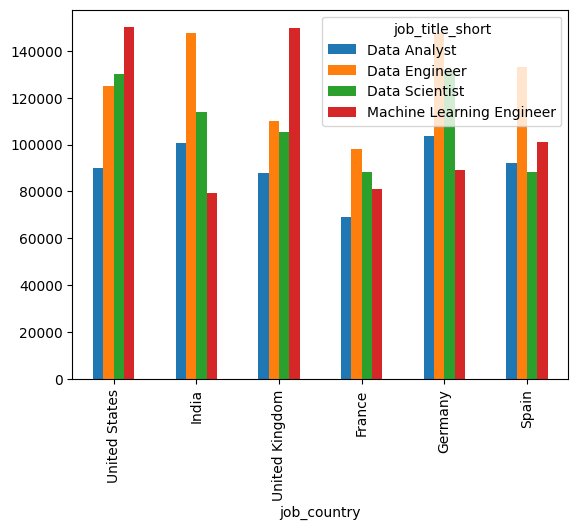

In [11]:
top_countries = df['job_country'].value_counts().head(6).index

df_job_country_salary = df.pivot_table(
    values='salary_year_avg',
    index= 'job_country',
    columns='job_title_short',
    aggfunc='median'
)

df_job_country_salary = df_job_country_salary.loc[top_countries]

job_title= ['Data Analyst', 'Data Engineer', 'Data Scientist', 'Machine Learning Engineer']

df_job_country_salary = df_job_country_salary[job_title]

df_job_country_salary.plot(kind='bar')

<Figure size 1000x600 with 0 Axes>

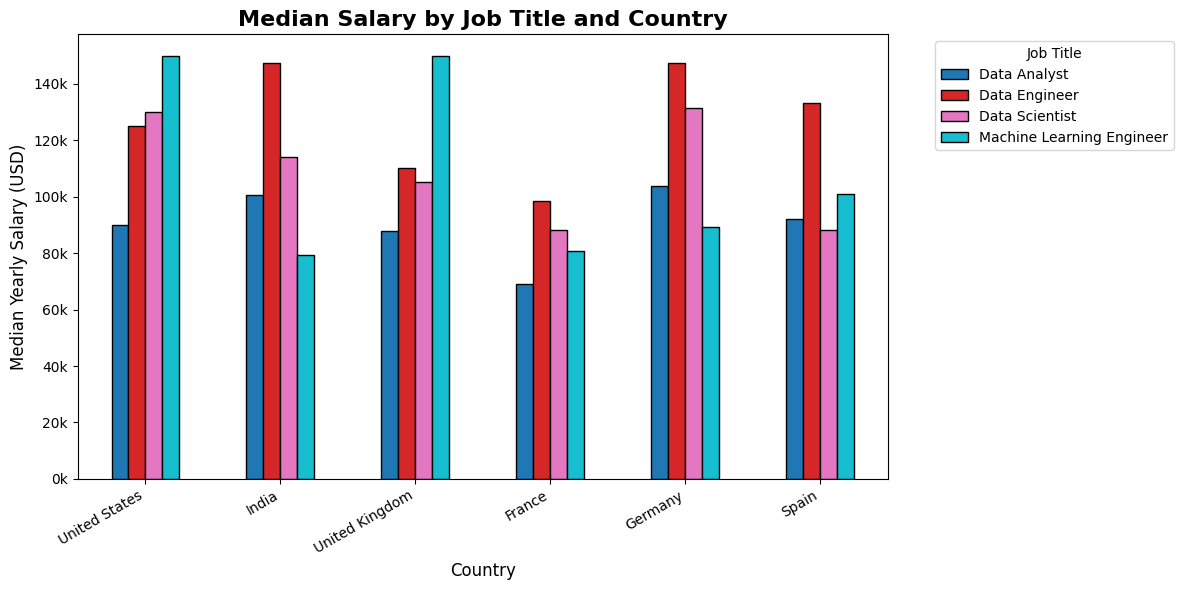

In [12]:
import matplotlib.pyplot as plt

# Plot with better style
plt.figure(figsize=(10,6))

df_job_country_salary.plot(
    kind='bar',
    figsize=(12,6),
    colormap='tab10',   # Better color palette
    edgecolor='black'
)

plt.title("Median Salary by Job Title and Country", fontsize=16, fontweight='bold')
plt.ylabel("Median Yearly Salary (USD)", fontsize=12)
plt.xlabel("Country", fontsize=12)

# Rotate x-labels for readability
plt.xticks(rotation=30, ha='right')

# Use commas for salary values on y-axis
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

# Put legend outside to avoid clutter
plt.legend(title="Job Title", bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()


In [14]:
df_usa = df[df['job_country'] == 'United States']

df_usa

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}"
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


In [15]:
df.index.name= 'index'
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
index,,,,,,,,,,,,,,,,,
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [18]:
df_usa.reset_index(inplace=True)
df_usa

,level_0,index,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,0,0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,1,3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
2,2,5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
3,3,6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
4,4,9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206287,206287,785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
206288,206288,785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
206289,206289,785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}"
206290,206290,785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


In [19]:
df_usa.set_index('index', inplace= True)
df_usa


,level_0,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
index,,,,,,,,,,,,,,,,,,
0,0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,1,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,2,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
6,3,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,4,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,206287,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
785685,206288,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
785692,206289,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}"


In [22]:
median_pivot = df_usa.pivot_table(values= 'salary_year_avg', index= 'job_title_short', aggfunc=['mean', 'median', 'max' ,'min'])

median_pivot

,mean,median,max,min
,salary_year_avg,salary_year_avg,salary_year_avg,salary_year_avg
job_title_short,,,,
Business Analyst,96175.447397,90000.0,387460.0,35000.0
Cloud Engineer,120090.900000,116100.0,221844.0,42000.0
Data Analyst,94553.964924,90000.0,375000.0,25000.0
Data Engineer,134226.676753,125000.0,525000.0,23496.0
Data Scientist,139946.707204,130000.0,960000.0,30000.0
Machine Learning Engineer,154240.382812,150000.0,315000.0,44408.5
Senior Data Analyst,115729.129954,110000.0,425000.0,35360.0
Senior Data Engineer,151448.023186,150000.0,375000.0,45000.0


In [24]:
median_pivot.sort_values(by= ('median', 'salary_year_avg'), ascending= False)

,mean,median,max,min
,salary_year_avg,salary_year_avg,salary_year_avg,salary_year_avg
job_title_short,,,,
Senior Data Scientist,159330.432029,155000.0,475000.0,55000.0
Machine Learning Engineer,154240.382812,150000.0,315000.0,44408.5
Senior Data Engineer,151448.023186,150000.0,375000.0,45000.0
Data Scientist,139946.707204,130000.0,960000.0,30000.0
Software Engineer,137964.929588,130000.0,375000.0,48982.0
Data Engineer,134226.676753,125000.0,525000.0,23496.0
Cloud Engineer,120090.900000,116100.0,221844.0,42000.0
Senior Data Analyst,115729.129954,110000.0,425000.0,35360.0
